In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm

## approach 1  Random Search

In [3]:
def run_episode(env, parameters):  
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

In [4]:
env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/home/e/Downloads/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


In [5]:
bestparams = None  
bestreward = 0
goal = False
for _ in range(10000):  
    parameters = np.random.rand(4) * 2 - 1
    reward = run_episode(env,parameters)
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
        # considered solved if the agent lasts 200 timesteps
        if reward >= 200:
            goal = True
            break
if goal:
    print("With parameters {} reachs rewards:{}".format(bestparams,bestreward))
else:
    print("Failed to reach goal with reaward:{}".format(bestreward))


With parameters [-0.73023377  0.67290906 -0.26942372  0.61230515] reachs rewards:200.0


In [6]:
def random_search(env):
    goal = False
    for step in range(10000):
        parameters = np.random.rand(4)*2 -1
        reward = run_episode(env,parameters)
        if reward >= 200:
            goal = True
            break
    return step,goal

In [7]:
steps = []

for _ in tqdm(range(1000)):
    steps.append(random_search(env)[0])

100%|██████████| 1000/1000 [00:08<00:00, 113.60it/s]


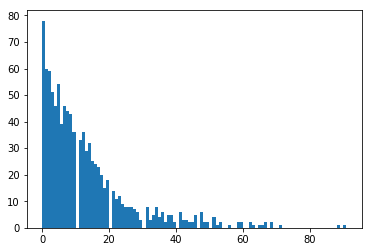

In [8]:
plt.figure()
plt.hist(steps,bins=100)
plt.show()


In [9]:
from scipy import stats

In [10]:
stats.describe(steps)

DescribeResult(nobs=1000, minmax=(0, 91), mean=12.895, variance=178.6105855855856, skewness=1.9354316627767847, kurtosis=4.704756588209894)

## approach 2  Hill Climbing

In [11]:
def hill_climbing(env,noise_scaling = 0.1):
    parameters = np.random.rand(4) * 2 - 1  
    bestreward = 0
    goal = False
    scaling = noise_scaling
    for step in range(10000):  
        newparams = parameters + (np.random.rand(4) * 2 - 1)* scaling
        reward = run_episode(env,newparams)
        if reward > bestreward:
            bestreward = reward
            parameters = newparams
            scaling = noise_scaling
            if reward >= 200:
                goal = True
                break
        else:
            scaling = (scaling*2)/(1+scaling)
            
    return step,goal

In [12]:
steps = []
for _ in tqdm(range(1000)):
    steps.append(hill_climbing(env,noise_scaling=0.2)[0])

100%|██████████| 1000/1000 [00:37<00:00,  8.46it/s]


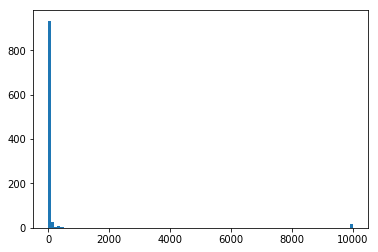

In [13]:
plt.figure()
plt.hist(steps,bins=100)
plt.show()

In [14]:
steps_np = np.array(steps)
stats.describe(steps_np[steps_np<9999])


DescribeResult(nobs=983, minmax=(0, 6721), mean=48.9145473041709, variance=92568.47537879183, skewness=16.12461950953424, kurtosis=295.6782261889871)